In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
style.use('fivethirtyeight')
from tensorflow.keras import layers

In [2]:
import pathlib
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dataset_dir=tf.keras.utils.get_file(origin=dataset_url,
                                    fname='flower_photos',
                                    untar=True)
dataset_dir=pathlib.Path(dataset_dir)

In [3]:
dataset_dir

WindowsPath('C:/Users/personal/.keras/datasets/flower_photos')

In [4]:
dirct=os.listdir(dataset_dir)
dirct

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']

In [5]:
image_count=len(list(dataset_dir.glob('*/*.jpg')))
image_count

3670

tulips


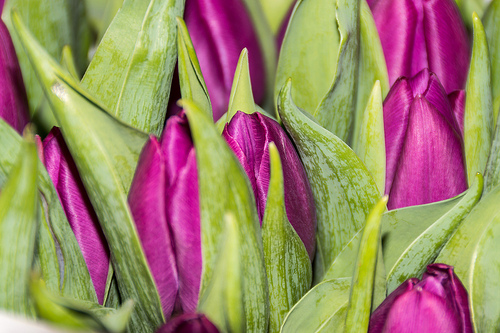

In [6]:
n=5
img=35
print(dirct[n])
flowers=list(dataset_dir.glob(dirct[n]+'/*'))
PIL.Image.open(str(flowers[img]))

In [7]:
batch_size=32
img_height=180
img_width=180

In [8]:
training_dataset=tf.keras.preprocessing.image_dataset_from_directory(
                 dataset_dir,
                 validation_split=0.2,
                 subset='training',
                 seed=120,
                 image_size=(img_height,img_width),
                 batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [9]:
validation_dataset=tf.keras.preprocessing.image_dataset_from_directory(
                 dataset_dir,
                 validation_split=0.2,
                 subset='validation',
                 seed=120,
                 image_size=(img_height,img_width),
                 batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [10]:
class_names=training_dataset.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [11]:
def show_images(n,data):
    plt.figure(figsize=(10,10))
    for images,lables in data.take(1):
        for i in range(n**2):
            axis=plt.subplot(n,n,i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[lables[i]])
            plt.axis("off")

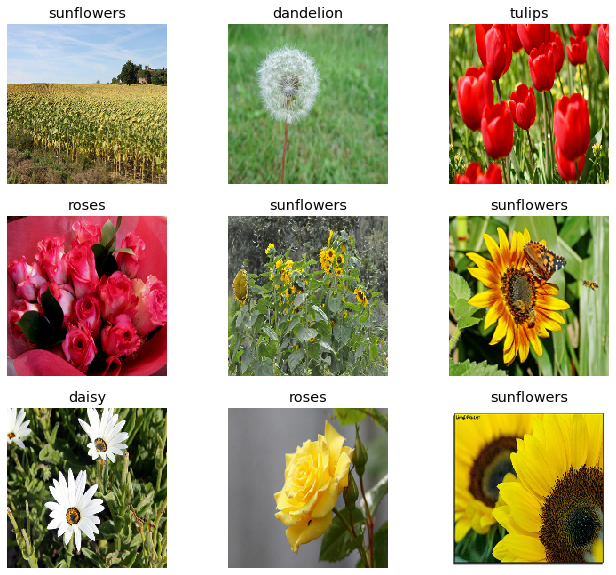

In [12]:
show_images(3,training_dataset)

In [13]:
for img_batches,img_labels in training_dataset:
    print(img_batches.shape)
    print(img_labels.shape)
    break

(32, 180, 180, 3)
(32,)


In [14]:
def normalize(data):
        normalization_layer=tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
        normalized_dataset=data.map(lambda x,y: (normalization_layer(x),y))
        return normalized_dataset

In [15]:
normalize_dataset=normalize(training_dataset)
#training_dataset=normalize(training_dataset)
#validation_dataset=normalize(validation_dataset)

In [16]:
image_batch,labels_batch=next(iter(normalize_dataset))
first_image=image_batch[0]
#print(first_image)
print(np.min(first_image),np.max(first_image))

0.08184904 0.86684096


### Or, you can include the layer inside your model definition to simplify deployment. We will use the second approach -by tf

.cache() keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

.prefetch() overlaps data preprocessing and model execution while training.

In [17]:
def configure(training,validation):
    AUTOTUNE = tf.data.experimental.AUTOTUNE
    training=training.cache().prefetch(buffer_size=AUTOTUNE)
    validation=validation.cache().prefetch(buffer_size=AUTOTUNE)
    return training,validation

In [18]:
training_dataset,validation_dataset=configure(training_dataset,validation_dataset)

In [19]:
def compile_model(model,noc,optimizer=None):
    if optimizer is None:
        optimizer='adam'
    if noc>2:
        loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True)
    else:
        loss=tf.losses.BinaryCrossentropy(from_logits=True)
        
    model.compile(optimizer=optimizer,
                 loss=loss,
                 metrics=['accuracy'])
    
    #model.summary()
    
    return model

In [21]:
num_classes = 5

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [22]:
model=compile_model(model,num_classes,optimizer='adam')

In [23]:
model.fit(training_dataset,
          validation_data=validation_dataset,
          epochs=3)

Epoch 1/3
92/92 [==============================] - ETA: 0s - loss: 1.6140 - accuracy: 0.15 - ETA: 22s - loss: 1.8348 - accuracy: 0.109 - ETA: 29s - loss: 1.7416 - accuracy: 0.166 - ETA: 32s - loss: 1.7185 - accuracy: 0.179 - ETA: 34s - loss: 1.6859 - accuracy: 0.225 - ETA: 36s - loss: 1.6634 - accuracy: 0.234 - ETA: 36s - loss: 1.6418 - accuracy: 0.250 - ETA: 37s - loss: 1.6320 - accuracy: 0.250 - ETA: 37s - loss: 1.6323 - accuracy: 0.243 - ETA: 37s - loss: 1.6275 - accuracy: 0.243 - ETA: 37s - loss: 1.6109 - accuracy: 0.250 - ETA: 37s - loss: 1.6030 - accuracy: 0.247 - ETA: 37s - loss: 1.5873 - accuracy: 0.264 - ETA: 36s - loss: 1.5696 - accuracy: 0.276 - ETA: 36s - loss: 1.5606 - accuracy: 0.277 - ETA: 35s - loss: 1.5554 - accuracy: 0.279 - ETA: 35s - loss: 1.5485 - accuracy: 0.283 - ETA: 34s - loss: 1.5445 - accuracy: 0.289 - ETA: 34s - loss: 1.5278 - accuracy: 0.296 - ETA: 34s - loss: 1.5224 - accuracy: 0.292 - ETA: 33s - loss: 1.5074 - accuracy: 0.300 - ETA: 33s - loss: 1.5041 - a

92/92 [==============================] - ETA: 0s - loss: 0.9264 - accuracy: 0.62 - ETA: 20s - loss: 1.1044 - accuracy: 0.578 - ETA: 29s - loss: 1.0477 - accuracy: 0.614 - ETA: 34s - loss: 1.0376 - accuracy: 0.617 - ETA: 38s - loss: 1.0525 - accuracy: 0.587 - ETA: 42s - loss: 1.0625 - accuracy: 0.572 - ETA: 45s - loss: 1.0743 - accuracy: 0.580 - ETA: 46s - loss: 1.0687 - accuracy: 0.589 - ETA: 46s - loss: 1.0443 - accuracy: 0.600 - ETA: 46s - loss: 1.0523 - accuracy: 0.596 - ETA: 46s - loss: 1.0348 - accuracy: 0.602 - ETA: 46s - loss: 1.0297 - accuracy: 0.599 - ETA: 46s - loss: 1.0230 - accuracy: 0.603 - ETA: 45s - loss: 1.0151 - accuracy: 0.613 - ETA: 45s - loss: 1.0170 - accuracy: 0.618 - ETA: 45s - loss: 1.0181 - accuracy: 0.611 - ETA: 44s - loss: 1.0234 - accuracy: 0.599 - ETA: 44s - loss: 1.0308 - accuracy: 0.592 - ETA: 44s - loss: 1.0275 - accuracy: 0.588 - ETA: 43s - loss: 1.0562 - accuracy: 0.584 - ETA: 43s - loss: 1.0454 - accuracy: 0.592 - ETA: 42s - loss: 1.0484 - accuracy: 0

92/92 [==============================] - ETA: 0s - loss: 0.7589 - accuracy: 0.65 - ETA: 27s - loss: 1.0169 - accuracy: 0.593 - ETA: 35s - loss: 0.9279 - accuracy: 0.625 - ETA: 39s - loss: 0.8904 - accuracy: 0.656 - ETA: 41s - loss: 0.9137 - accuracy: 0.637 - ETA: 42s - loss: 0.9154 - accuracy: 0.640 - ETA: 43s - loss: 0.9252 - accuracy: 0.647 - ETA: 43s - loss: 0.9120 - accuracy: 0.644 - ETA: 43s - loss: 0.8858 - accuracy: 0.649 - ETA: 43s - loss: 0.8770 - accuracy: 0.650 - ETA: 43s - loss: 0.8628 - accuracy: 0.653 - ETA: 44s - loss: 0.8539 - accuracy: 0.658 - ETA: 44s - loss: 0.8473 - accuracy: 0.661 - ETA: 43s - loss: 0.8397 - accuracy: 0.665 - ETA: 43s - loss: 0.8405 - accuracy: 0.668 - ETA: 43s - loss: 0.8409 - accuracy: 0.668 - ETA: 42s - loss: 0.8415 - accuracy: 0.665 - ETA: 42s - loss: 0.8471 - accuracy: 0.658 - ETA: 41s - loss: 0.8414 - accuracy: 0.664 - ETA: 41s - loss: 0.8567 - accuracy: 0.657 - ETA: 40s - loss: 0.8434 - accuracy: 0.666 - ETA: 40s - loss: 0.8496 - accuracy: 0

In [24]:
loss=pd.DataFrame(model.history.history)
loss.tail()

,loss,accuracy,val_loss,val_accuracy
0,1.234331,0.462193,1.081177,0.572207
1,0.952314,0.631812,1.000054,0.611717
2,0.794299,0.693460,0.949655,0.628065


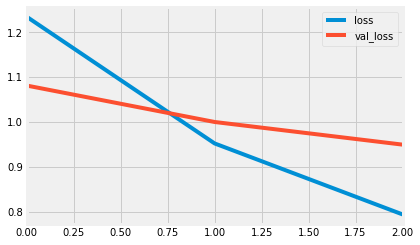

In [25]:
loss[["loss","val_loss"]].plot()

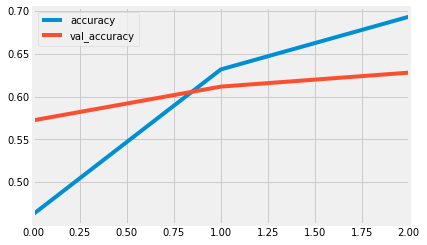

In [26]:
loss[["accuracy","val_accuracy"]].plot()

## Using tf.data for finer control

In [84]:
list_ds = tf.data.Dataset.list_files(str(dataset_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

In [85]:
for f in list_ds.take(5):
    print(f.numpy())

b'C:\\Users\\personal\\.keras\\datasets\\flower_photos\\roses\\1788484468_f73afa6c32_n.jpg'
b'C:\\Users\\personal\\.keras\\datasets\\flower_photos\\sunflowers\\5437996076_cf7e2ac32e_n.jpg'
b'C:\\Users\\personal\\.keras\\datasets\\flower_photos\\dandelion\\2995221296_a6ddaccc39.jpg'
b'C:\\Users\\personal\\.keras\\datasets\\flower_photos\\sunflowers\\1484598527_579a272f53.jpg'
b'C:\\Users\\personal\\.keras\\datasets\\flower_photos\\tulips\\7447655334_e8f805ab95_m.jpg'


In [86]:
class_names = np.array(sorted([item.name for item in dataset_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']


In [87]:
val_size = int(image_count * 0.2)
train_ds = dataset_list.skip(val_size)
val_ds = dataset_list.take(val_size)

In [88]:
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

2936
734


In [89]:
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

In [90]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])

In [91]:
def process_path(file_path):
    label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

In [92]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [95]:
for image,label in train_ds.take(1):
    print("Image shape ",image.numpy().shape)
    print("label: ",label.numpy())

Image shape  (180, 180, 3)
label:  3


In [96]:
def configure_for_performance(ds):
    ds = ds.cache()
    ds = ds.shuffle(buffer_size=1000)
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

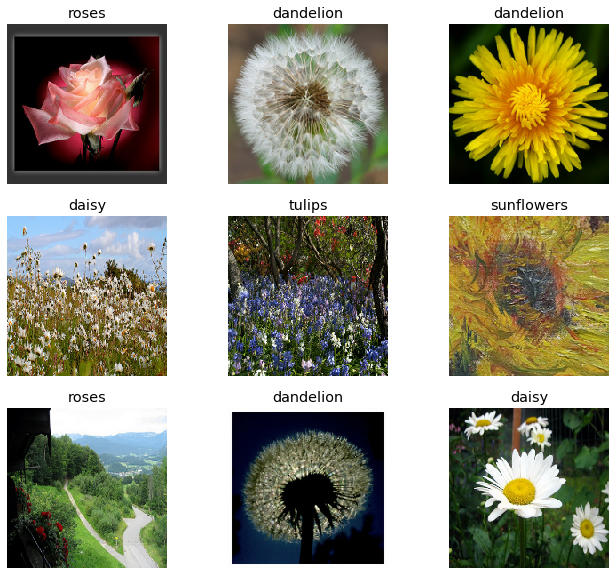

In [97]:
show_images(3,train_ds)

In [98]:
model.fit(train_ds,
          validation_data=val_ds,
          epochs=3)

Epoch 1/3
92/92 [==============================] - ETA: 0s - loss: 0.7191 - accuracy: 0.71 - ETA: 24s - loss: 0.6417 - accuracy: 0.765 - ETA: 32s - loss: 0.6613 - accuracy: 0.760 - ETA: 35s - loss: 0.7262 - accuracy: 0.734 - ETA: 37s - loss: 0.7488 - accuracy: 0.737 - ETA: 39s - loss: 0.7371 - accuracy: 0.729 - ETA: 40s - loss: 0.7241 - accuracy: 0.741 - ETA: 39s - loss: 0.7438 - accuracy: 0.730 - ETA: 39s - loss: 0.7319 - accuracy: 0.729 - ETA: 39s - loss: 0.7148 - accuracy: 0.737 - ETA: 39s - loss: 0.7202 - accuracy: 0.730 - ETA: 38s - loss: 0.7059 - accuracy: 0.734 - ETA: 39s - loss: 0.7007 - accuracy: 0.735 - ETA: 38s - loss: 0.7011 - accuracy: 0.738 - ETA: 38s - loss: 0.6911 - accuracy: 0.739 - ETA: 38s - loss: 0.6864 - accuracy: 0.740 - ETA: 37s - loss: 0.6790 - accuracy: 0.742 - ETA: 37s - loss: 0.6860 - accuracy: 0.739 - ETA: 37s - loss: 0.6866 - accuracy: 0.738 - ETA: 37s - loss: 0.6985 - accuracy: 0.732 - ETA: 36s - loss: 0.6976 - accuracy: 0.736 - ETA: 36s - loss: 0.6901 - a

92/92 [==============================] - ETA: 0s - loss: 0.4913 - accuracy: 0.84 - ETA: 28s - loss: 0.5223 - accuracy: 0.828 - ETA: 36s - loss: 0.5412 - accuracy: 0.822 - ETA: 40s - loss: 0.5692 - accuracy: 0.820 - ETA: 42s - loss: 0.5272 - accuracy: 0.843 - ETA: 44s - loss: 0.5113 - accuracy: 0.843 - ETA: 44s - loss: 0.5282 - accuracy: 0.825 - ETA: 44s - loss: 0.5245 - accuracy: 0.828 - ETA: 44s - loss: 0.5072 - accuracy: 0.840 - ETA: 45s - loss: 0.5109 - accuracy: 0.837 - ETA: 45s - loss: 0.4985 - accuracy: 0.838 - ETA: 45s - loss: 0.4941 - accuracy: 0.838 - ETA: 45s - loss: 0.4995 - accuracy: 0.834 - ETA: 45s - loss: 0.5010 - accuracy: 0.830 - ETA: 45s - loss: 0.5134 - accuracy: 0.820 - ETA: 44s - loss: 0.5203 - accuracy: 0.812 - ETA: 44s - loss: 0.5134 - accuracy: 0.816 - ETA: 43s - loss: 0.5116 - accuracy: 0.812 - ETA: 43s - loss: 0.5027 - accuracy: 0.817 - ETA: 42s - loss: 0.5028 - accuracy: 0.815 - ETA: 42s - loss: 0.5090 - accuracy: 0.811 - ETA: 42s - loss: 0.5087 - accuracy: 0

92/92 [==============================] - ETA: 0s - loss: 0.3986 - accuracy: 0.93 - ETA: 26s - loss: 0.3386 - accuracy: 0.937 - ETA: 35s - loss: 0.3416 - accuracy: 0.937 - ETA: 39s - loss: 0.3243 - accuracy: 0.929 - ETA: 41s - loss: 0.3114 - accuracy: 0.925 - ETA: 43s - loss: 0.3076 - accuracy: 0.927 - ETA: 43s - loss: 0.3027 - accuracy: 0.919 - ETA: 44s - loss: 0.3012 - accuracy: 0.910 - ETA: 44s - loss: 0.3075 - accuracy: 0.909 - ETA: 44s - loss: 0.3023 - accuracy: 0.912 - ETA: 44s - loss: 0.3099 - accuracy: 0.911 - ETA: 44s - loss: 0.3075 - accuracy: 0.911 - ETA: 44s - loss: 0.3119 - accuracy: 0.908 - ETA: 43s - loss: 0.2993 - accuracy: 0.912 - ETA: 43s - loss: 0.3065 - accuracy: 0.908 - ETA: 43s - loss: 0.3090 - accuracy: 0.908 - ETA: 42s - loss: 0.3034 - accuracy: 0.911 - ETA: 42s - loss: 0.2997 - accuracy: 0.913 - ETA: 41s - loss: 0.2981 - accuracy: 0.912 - ETA: 41s - loss: 0.2960 - accuracy: 0.912 - ETA: 41s - loss: 0.2984 - accuracy: 0.909 - ETA: 40s - loss: 0.3111 - accuracy: 0

In [99]:
loss=pd.DataFrame(model.history.history)
loss.tail()

,loss,accuracy,val_loss,val_accuracy
0,0.687438,0.738420,0.706289,0.737057
1,0.487218,0.818120,0.728342,0.728883
2,0.290784,0.905654,0.848990,0.728883


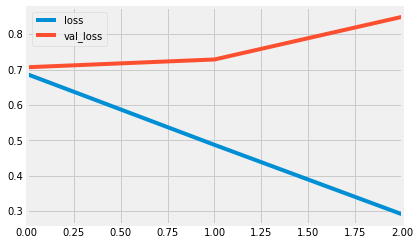

In [100]:
loss[["loss","val_loss"]].plot()